# Linear Regression + Ridge & Lasso Regression 

In [7]:
# Run the code cell below
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn import datasets, linear_model, preprocessing, model_selection

import sklearn.model_selection
from sklearn.model_selection import KFold
%matplotlib inline

# Data Import
Import the data from the file. Process data into dataframes and then into X,Y numpy arrays.

In [23]:

#df = pd.read_csv('/Users/Farhad_Ahmed/Desktop/ML intros/ML Project/HS_Regents_Sat_Scores_2015.csv')
df = pd.read_csv('HS_Regents_Sat_Scores_2015.csv')
#print(df)
#data = df.values

# extract all the columns that we need
df1=np.stack((df['Algebra2/Trigonometry'], df['English'], df['Geometry'],df['Global History and Geography'], df['Integrated Algebra'], df['Living Environment'], df['Physical Settings/Chemistry'], df['Physical Settings/Physics'], df['Average SAT Score (Total)'])).T

#remove any empty rows
df2=(df1[~np.isnan(df1).any(axis=1)])
#print(df2)
#print(df2.shape)

# df3 will be our feature matrix
df3 = df2[:,:8]
#print(df3)

# df4 will be the target vector
df4 = df2[:,8:]
#print(df4)

X = np.array(df3)
Y = np.array(df4)



    # Splitting Data Into Training And Test Set Using K-Fold. Do the next steps for each K-Fold Training and Test set

# Step 0: Fit a linear model and print the testset error. 

# Step 1: Ridge Regression
Fit a ridge model using linear_model.ridge(warm_start=True, fit_intercept = True). The alphas variable contaings 100 values of regularization parameter. Fit 100 models with these 100 different values of alphas and find test errors for all these 100 models and plot test error v/s alpha. 

# Step 2: Plotting Test Error v/s Alphas
Plot test errors v/s alphas in the code cell below.

# Step 3: Lasso Regression
Ffit a lasso model using linear_model.Lasso(warm_start=True, fit_intercept = True). The alphas variable contaings 100 values of regularization parameter. Fit 100 models with these 100 different values of alphas and find test errors for all these 100 models and plot test error v/s alpha.

# Step 4: Plotting Test Error v/s Alphas
Plot test errors v/s alphas in the code cell below.

# Step 5. Display the coefficients
coefficients = model.coef_
non_zeros = np.sum(coefficients != 0)
print("The number of non-zero coefficients is:",str(non_zeros))
print("The Coefficients are: \n",coefficients)


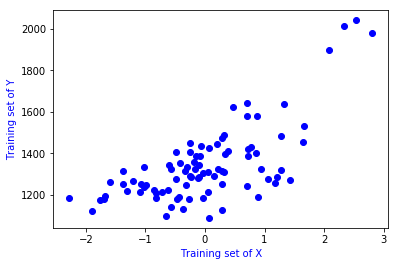

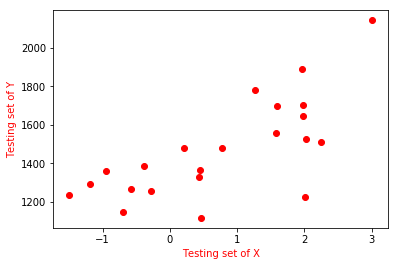

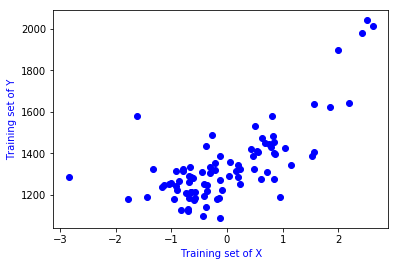

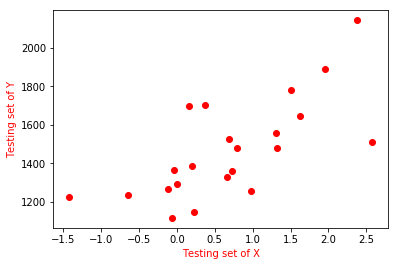

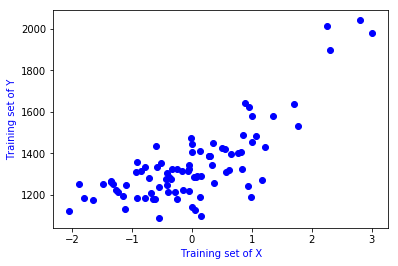

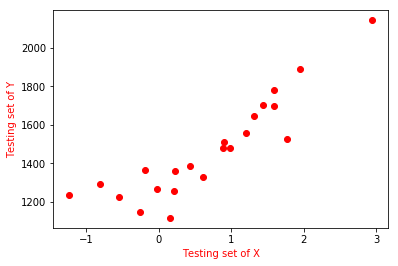

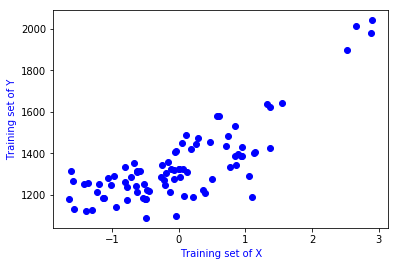

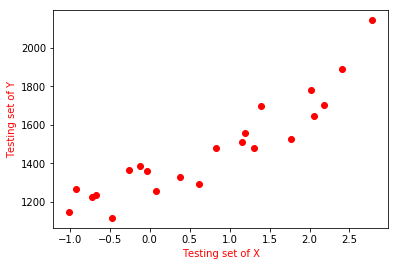

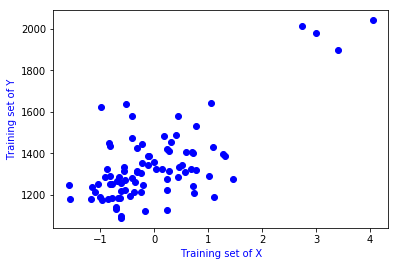

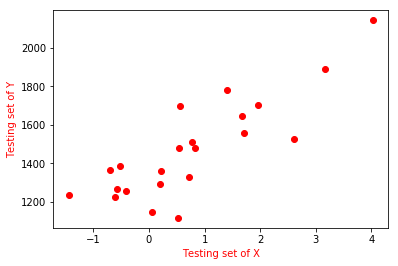

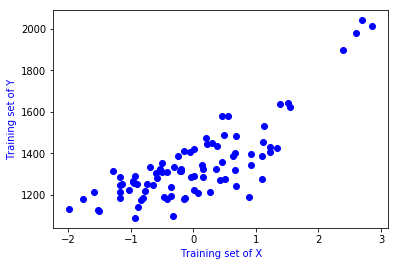

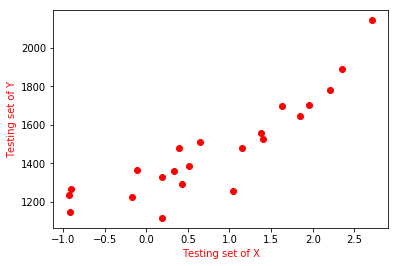

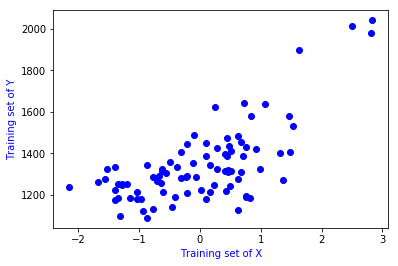

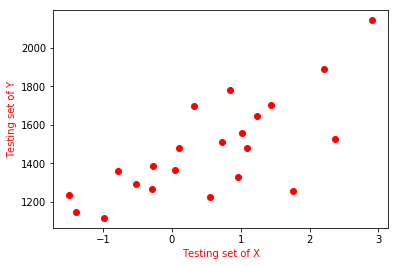

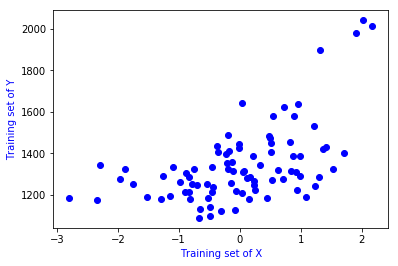

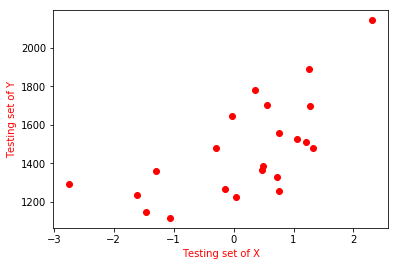

The test set error is:  6457.075420465331


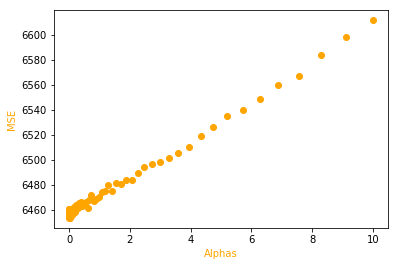

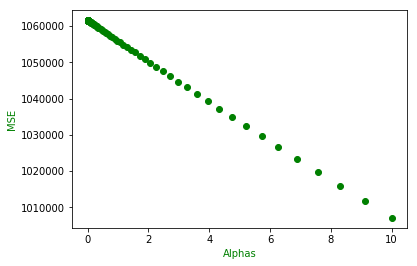

The number of non-zero coefficients is: 8
The Coefficients are: 
 [33.77272425 28.23383417 17.55128868 40.50280302  6.61417949 32.23859975
  8.72808299  1.33229049]


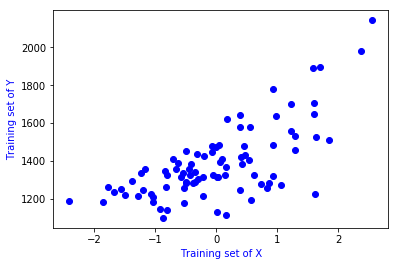

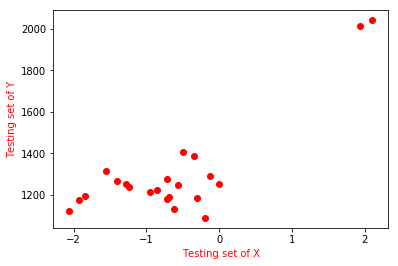

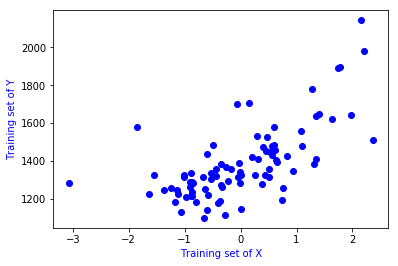

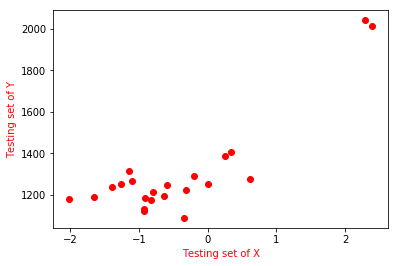

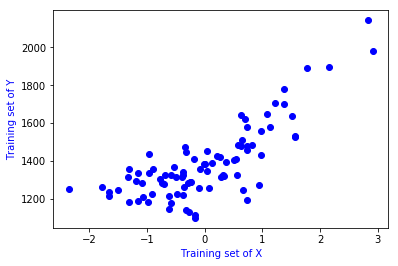

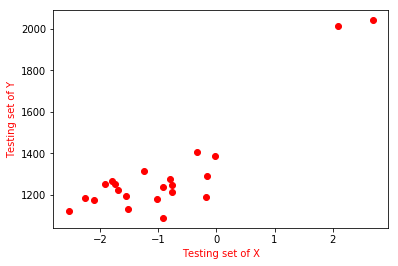

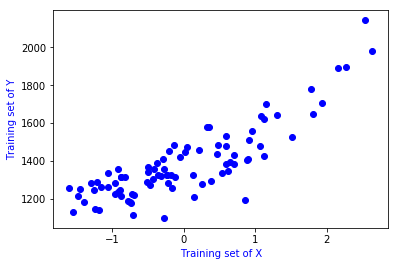

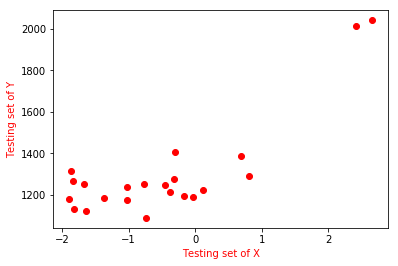

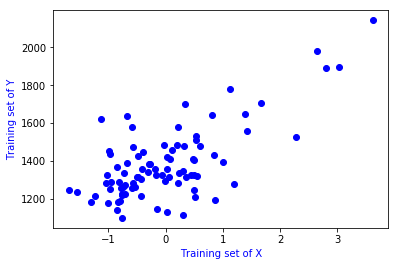

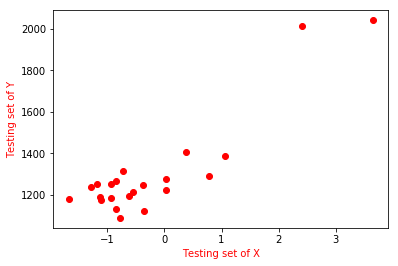

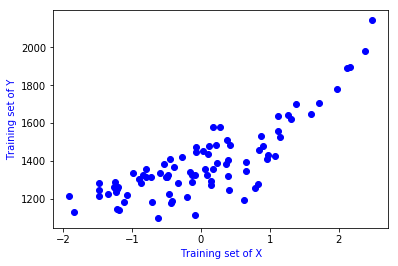

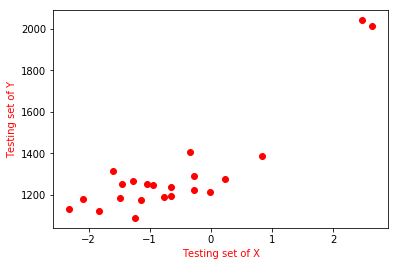

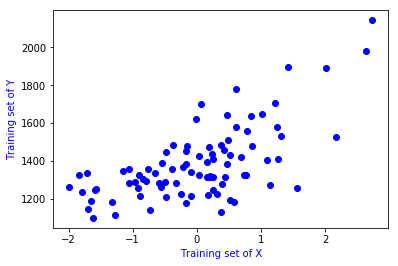

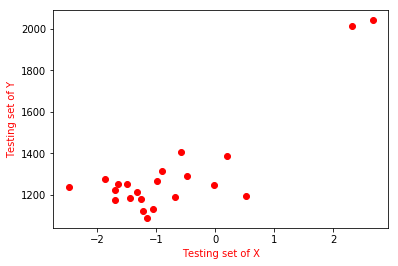

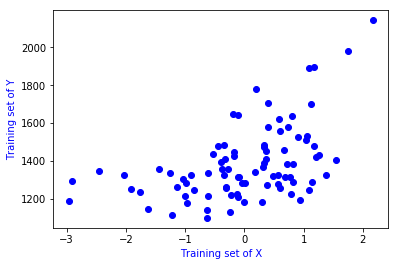

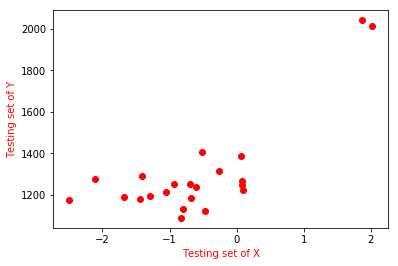

The test set error is:  6763.420098067418


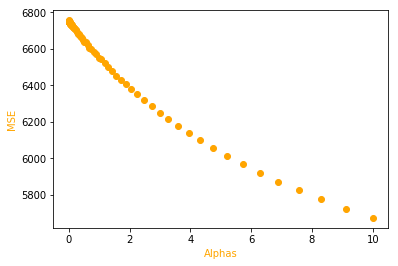

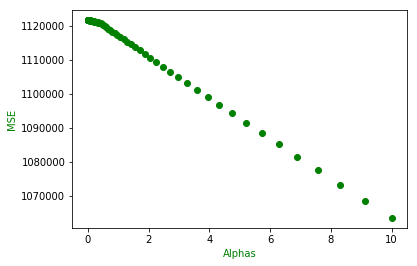

The number of non-zero coefficients is: 5
The Coefficients are: 
 [27.52856948  4.71076146 25.82145368 98.86752797  0.         15.356329
  0.          0.        ]


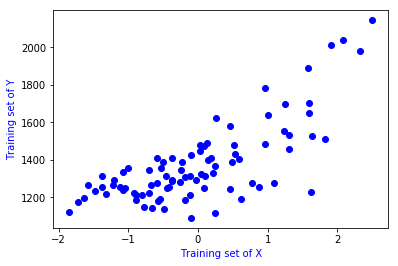

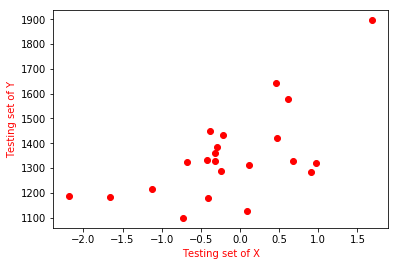

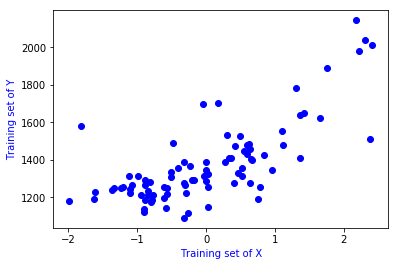

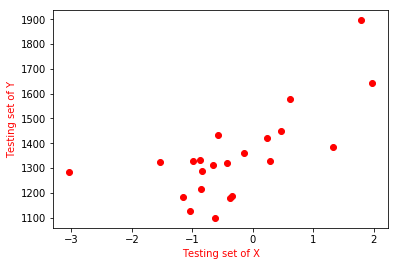

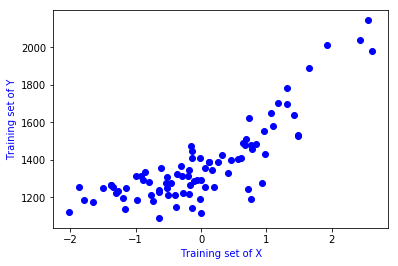

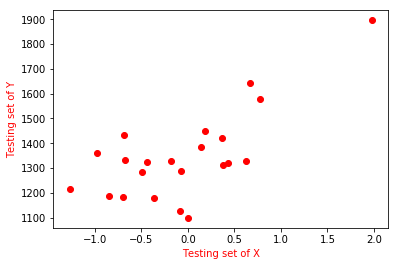

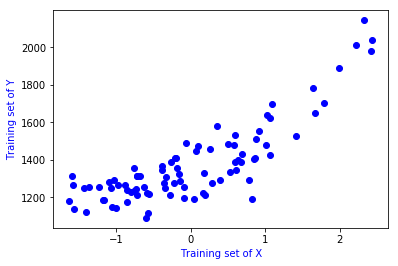

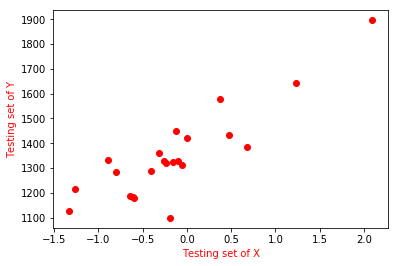

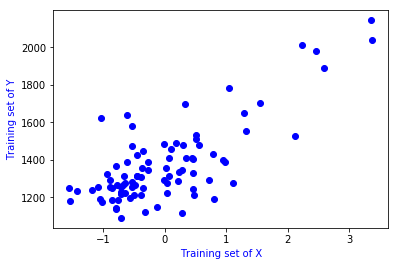

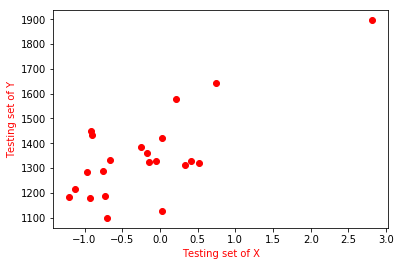

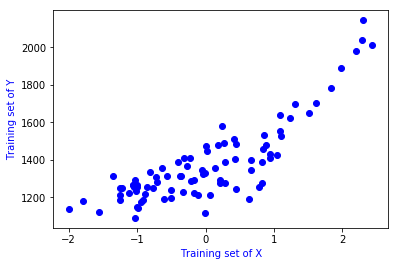

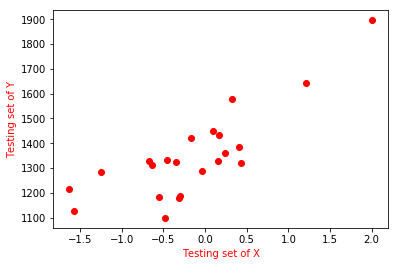

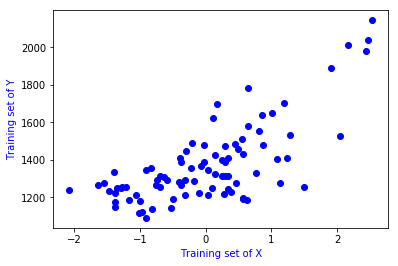

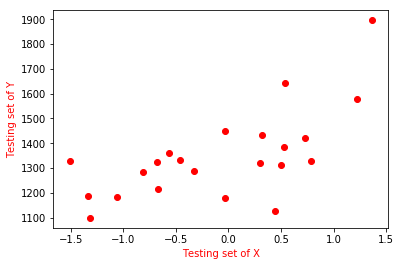

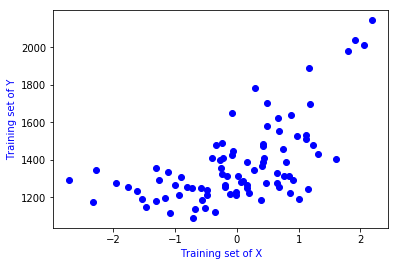

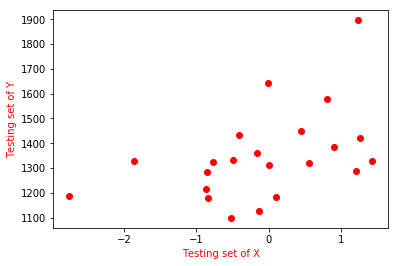

The test set error is:  3891.3920363946086


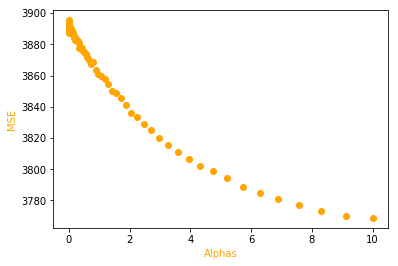

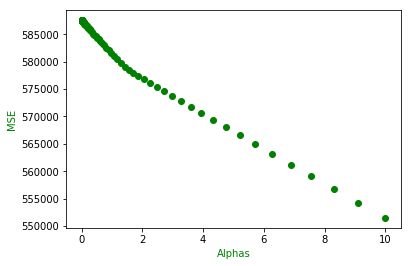

The number of non-zero coefficients is: 7
The Coefficients are: 
 [17.01630812 15.76763829 41.77687791 60.71102104 16.54447182 28.12565205
  0.         18.39260327]


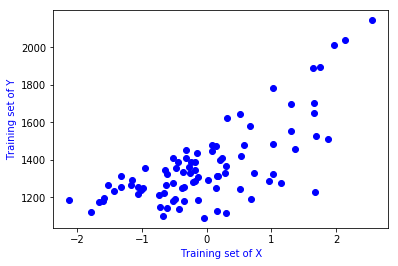

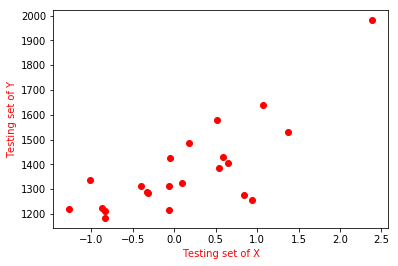

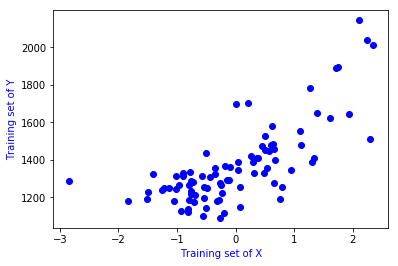

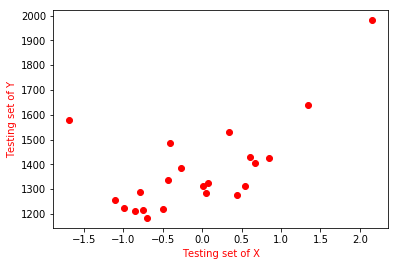

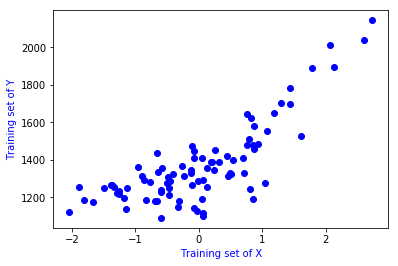

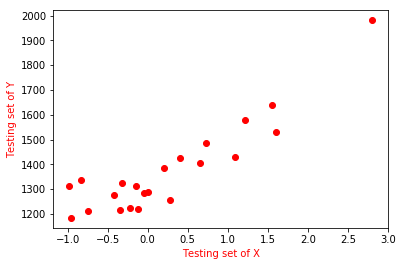

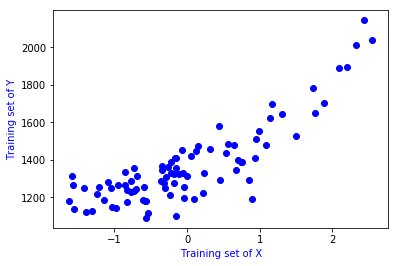

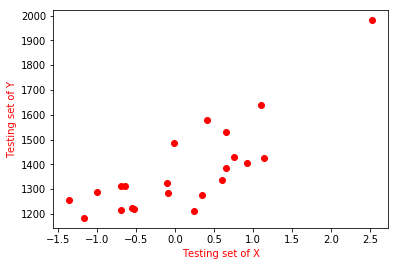

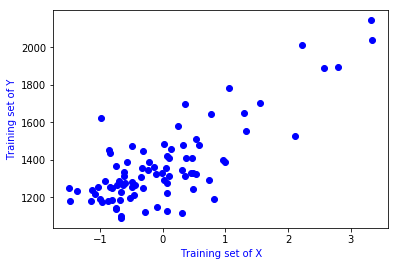

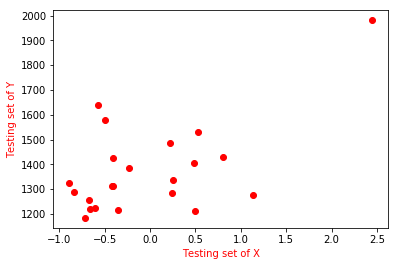

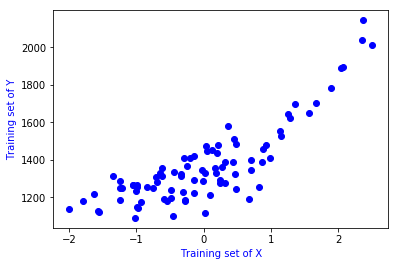

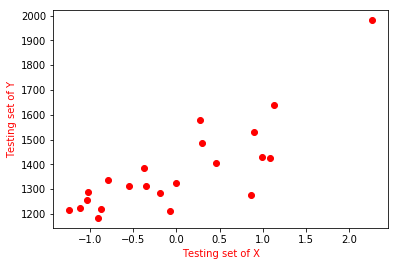

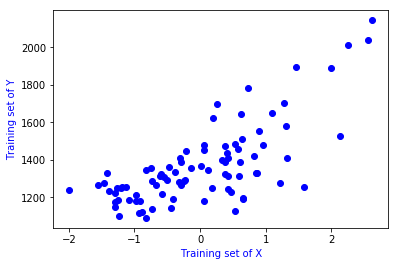

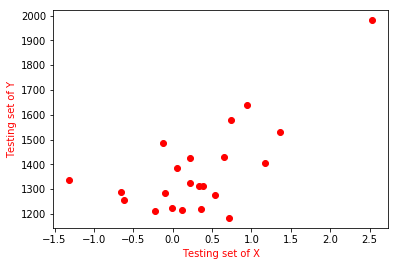

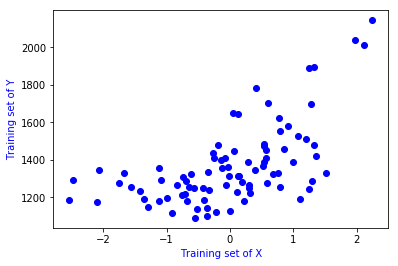

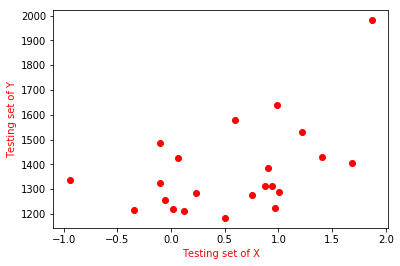

The test set error is:  5510.549546842471


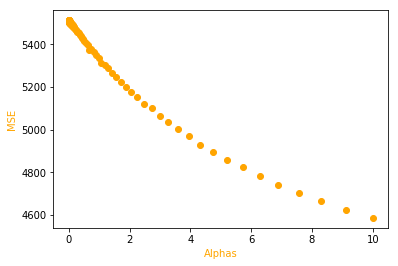

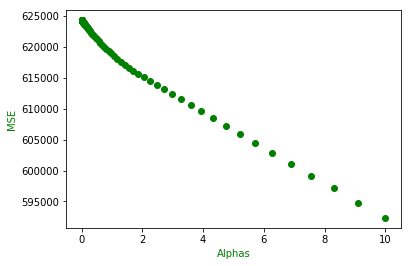

The number of non-zero coefficients is: 6
The Coefficients are: 
 [20.14637582 19.65587182  0.         68.50582379 31.48257095 35.82919712
  0.         25.57595037]


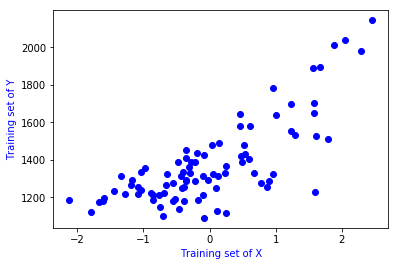

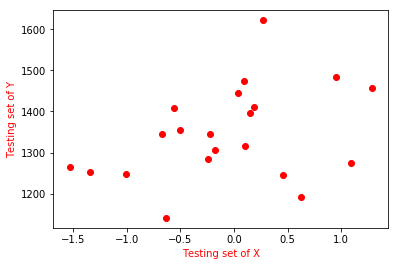

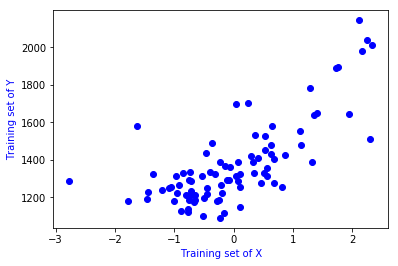

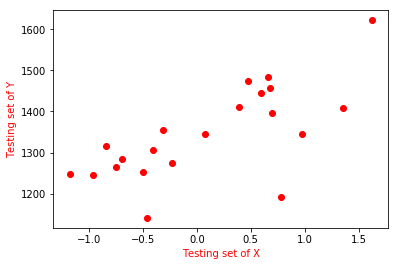

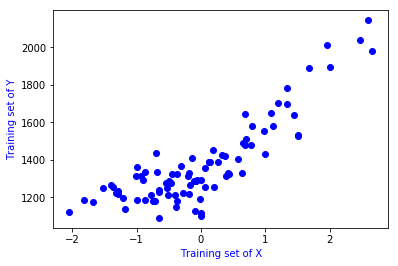

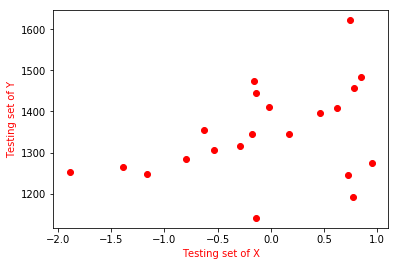

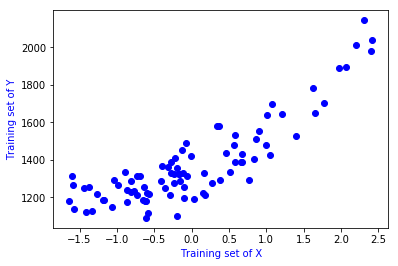

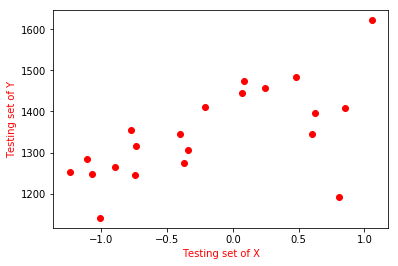

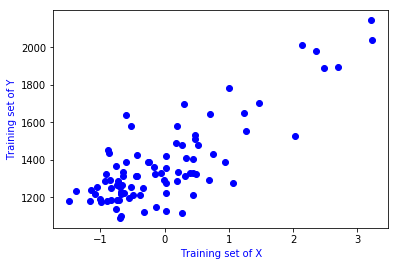

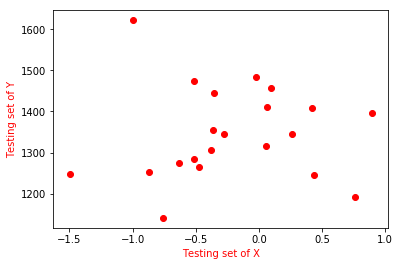

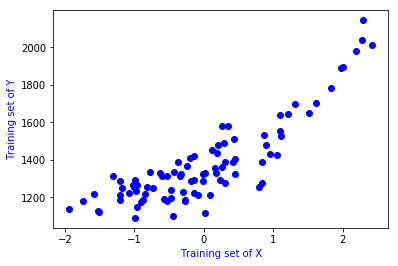

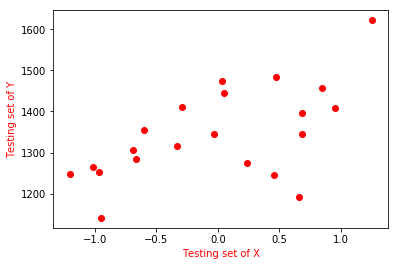

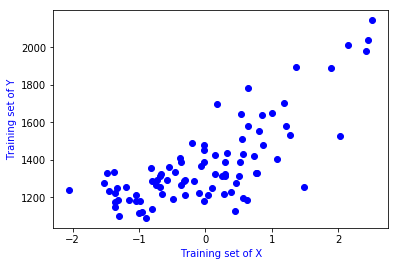

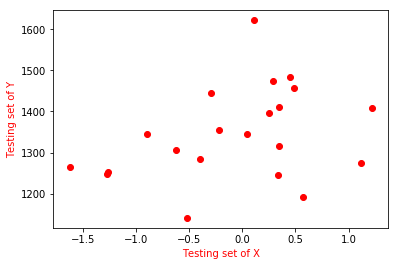

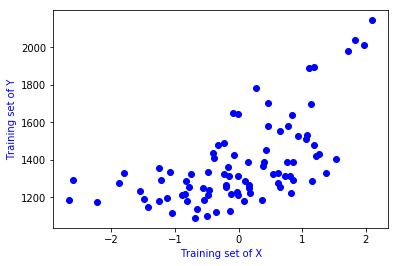

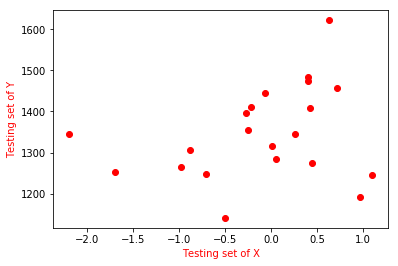

The test set error is:  7724.575669266937


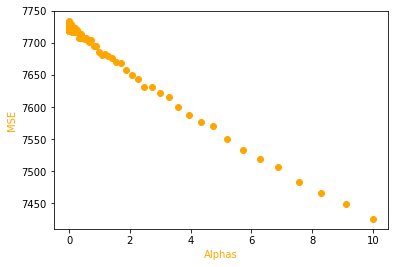

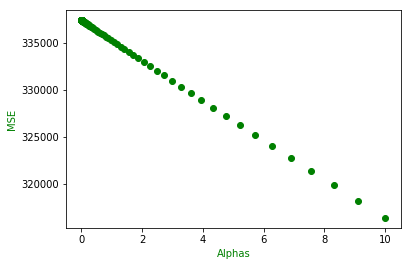

The number of non-zero coefficients is: 8
The Coefficients are: 
 [17.63408663 10.95095033 53.6276895  47.94643818 24.49855497 44.59215983
  0.72343639 13.73390863]


In [32]:
kf = KFold(n_splits=5)
for train, test in kf.split(X):
    
    X_tr, X_test, Y_tr, Y_test = X[train], X[test], Y[train], Y[test]
    
    
    scaler = preprocessing.StandardScaler().fit(X_tr)
    X_tr = scaler.transform(X_tr) # zero mean and unit variance
    X_test = scaler.transform(X_test) # The n later when
    
    
    for feature in range(0,8):
        plt.scatter(X_tr[:,feature],Y_tr,color="blue")
        plt.xlabel('Training set of X',color="blue")
        plt.ylabel('Training set of Y',color="blue")
        plt.show()

        plt.scatter(X_test[:,feature],Y_test,color="red")
        plt.xlabel('Testing set of X', color="red")
        plt.ylabel('Testing set of Y', color="red")
        plt.show()
    
    lin_fit_model = linear_model.LinearRegression()
    lin_fit_model.fit(X_tr, Y_tr)

    # Measure normalized MSE
    y_test_pred = lin_fit_model.predict(X_test)
    test_set_error = np.sum((y_test_pred - Y_test)**2) / (2*Y_test.shape[0]) 
    print("The test set error is: ", test_set_error)
    
    # Ridge Model
    model = linear_model.Ridge(fit_intercept = True, solver = 'sag')
    # The code below 
    nalpha = 100
    alphas = np.logspace(-3,1,nalpha)
    # Write code for finding costs for all the 100 models. YOu may use a for loop for this. 

    error_array = []
    for x in range(nalpha):
        model.alpha = alphas[x]
        model.fit(X_tr,Y_tr)
    
        pred = model.predict(X_test)
        error_array.append(np.sum((pred-Y_test)**2)/(2*Y_test.shape[0]))
        
    plt.scatter(alphas,error_array,color="orange")
    plt.xlabel('Alphas',color="orange")
    plt.ylabel('MSE',color="orange")
    plt.show()
    
    
    # Lasso Model
    model = linear_model.Lasso(warm_start=True, fit_intercept = True)
    # The code below 
    nalpha = 100
    alphas = np.logspace(-3,1,nalpha)
    # Write code for finding costs for all the 100 models. YOu may use a for loop for this. 

    error_array = []
    for x in range(nalpha):
        model.alpha = alphas[x]
        model.fit(X_tr,Y_tr)
    
        pred = model.predict(X_test)
        error_array.append(np.sum((pred-Y_test)**2)/(2*Y_test.shape[0]))
    
    
    plt.scatter(alphas,error_array,color="green")
    plt.xlabel('Alphas',color="green")
    plt.ylabel('MSE',color="green")
    plt.show()
    
    coefficients = model.coef_
    non_zeros = np.sum(coefficients != 0)
    print("The number of non-zero coefficients is:",str(non_zeros))
    print("The Coefficients are: \n",coefficients)